In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym

In [2]:
def max_action(q, state):
    values = np.array([q[state, a]for a in range(2)])
    action = np.argmax(values)
    return action

In [3]:
pole_theta_space = np.linspace(-0.20943951, 0.20943951, 10)
pole_theta_vel_space = np.linspace(-4, 4, 10)
cart_pos_space = np.linspace(-2.5, 2.4, 10)
cart_vel_space = np.linspace(-4, 4, 10)

In [4]:
def get_state(observation):
    cart_x, cart_x_dot, cart_theta, cart_theta_dot = observation
    cart_x = int(np.digitize(cart_x, cart_pos_space))
    cart_x_dot = int(np.digitize(cart_x_dot, cart_vel_space))
    cart_theta = int(np.digitize(cart_theta, pole_theta_space))
    cart_theta_dot = int(np.digitize(cart_theta_dot, pole_theta_vel_space))
    return (cart_x, cart_x_dot, cart_theta, cart_theta_dot)

In [5]:
def plot_running_average(totalrewards):
    N = len(totalrewards)
    running_avg = np.empty(N)
    for t in range(N):
       running_avg[t] = np.mean(totalrewards[max(0, t-100):(t+1)])
    plt.plot(running_avg)
    plt.title("Running Average")
    plt.show()

D:\apps\Anaconda3\envs\OpenAiGym\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


starting game  0
starting game  5000
starting game  10000
starting game  15000
starting game  20000
starting game  25000
starting game  30000
starting game  35000
starting game  40000
starting game  45000


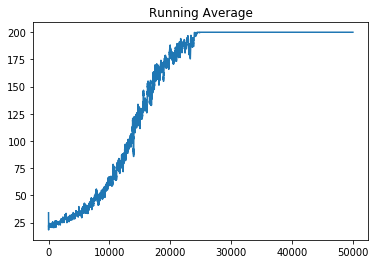

In [6]:
env = gym.make('CartPole-v0')
alpha = 0.1
gamma = 0.9
eps = 1.0

states = []
for i in range(len(cart_pos_space) + 1):
    for j in range(len(cart_vel_space) + 1):
        for k in range(len(pole_theta_space) + 1):
            for l in range(len(pole_theta_vel_space) + 1):
                states.append((i,j,k,l))
                
q = {}
for s in states:
    for a in range(2):
        q[s, a] = 0
        
num_games = 50000
total_rewards = np.zeros(num_games)

for i in range(num_games):
    if i % 5000 == 0:
        print('starting game ', i)
    observation = env.reset()
    s = get_state(observation)
    rand = np.random.random()
    a = max_action(q, s) if rand < (1-eps) else env.action_space.sample()
    done = False
    ep_rewards = 0
    while not done:
        observation_, reward, done, info = env.step(a)
        s_ = get_state(observation_)
        rand = np.random.random()
        a_ = max_action(q, s_) if rand < (1-eps) else env.action_space.sample()
        ep_rewards += reward
        q[s, a] += alpha * (reward + gamma*q[s_, a_] - q[s,a])
        s, a = s_, a_
    eps -= 2/num_games if eps > 0 else 0
    total_rewards[i] = ep_rewards
 
plot_running_average(total_rewards)
    


    